<a href="https://colab.research.google.com/github/Avani-N-2000/Customer-Segmentation/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem statement**

Given a large dataset of customer transactions, we aim to perform customer segmentation to understand buying behaviors. By using the K-Means clustering algorithm, we will group customers based on their purchasing patterns. This segmentation will help identify key customer groups, allowing the company to tailor marketing strategies and improve sales performance. The project will involve preparing the data, applying the K-Means algorithm, and analyzing the resulting clusters to provide actionable insights for more effective and targeted marketing. Additionally, we'll ensure the solution is scalable, cost-effective, and leverages relevant customer features for accurate segmentation.

In [115]:
# Import necessary libraries for data preprocessing and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math

# **Get the dataset and understand the data**

In [116]:
# Import the dataset from Drive
from google.colab import drive
drive.mount('/content/drive')
filepath ='/content/drive/MyDrive/Online Retail.xlsx'
df = pd.read_excel(filepath)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [117]:
# Dataset First view
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### **Number of rows and columns**

In [118]:
rows,columns = df.shape
print(f'Number of rows: {rows}')
print(f'Number of columns: {columns}')

Number of rows: 541909
Number of columns: 8


### **Check for duplicates**

In [119]:
print('Number of duplicated rows: ',df.duplicated().sum())

Number of duplicated rows:  5268


In [120]:
# Remove duplicates
df.drop_duplicates(inplace=True)

### **Dataset information**

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  object        
 1   StockCode    536641 non-null  object        
 2   Description  535187 non-null  object        
 3   Quantity     536641 non-null  int64         
 4   InvoiceDate  536641 non-null  datetime64[ns]
 5   UnitPrice    536641 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      536641 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.8+ MB


### **Dataset stats**

In [122]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,536641.000000,536641,536641.000000,401604.000000
mean,9.620029,2011-07-04 08:57:06.087421952,4.632656,15281.160818
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 10:52:00,1.250000,13939.000000
50%,3.000000,2011-07-19 14:04:00,2.080000,15145.000000
75%,10.000000,2011-10-18 17:05:00,4.130000,16784.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,219.130156,NaN,97.233118,1714.006089


###**Null values**

In [123]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135037
Country,0


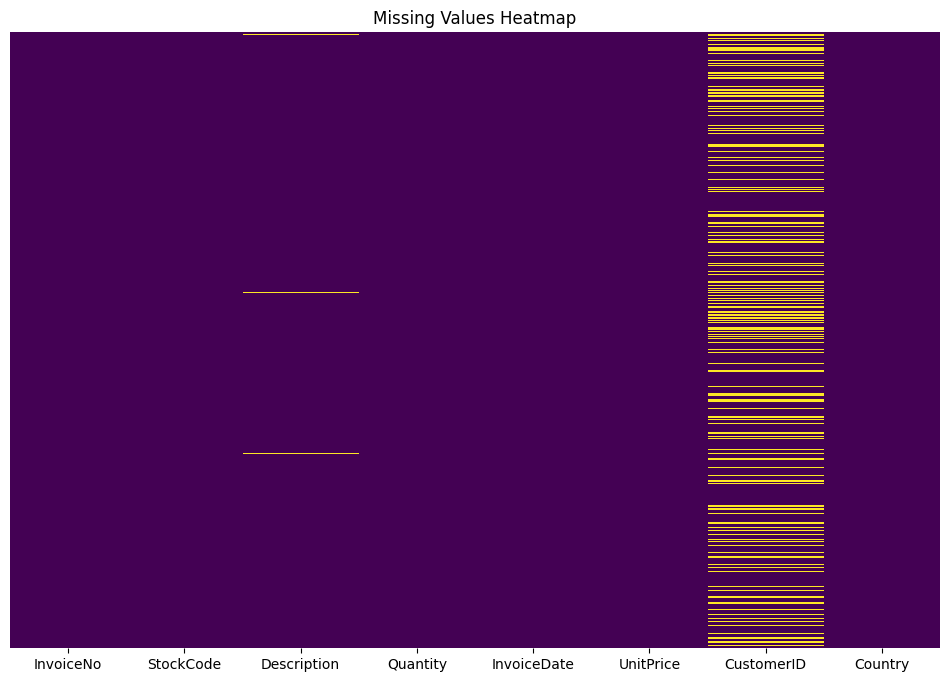

In [124]:
# Visualizing the missing values
# Create a heatmap of missing values
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False, xticklabels=df.columns)
plt.title('Missing Values Heatmap')
plt.show()

### **Unique values**

In [125]:
df.nunique()

,0
InvoiceNo,25900
StockCode,4070
Description,4223
Quantity,722
InvoiceDate,23260
UnitPrice,1630
CustomerID,4372
Country,38


# **EDA**

In [126]:
# All columns
df.columns.tolist()

['InvoiceNo',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'UnitPrice',
 'CustomerID',
 'Country']

### **Chart 1**

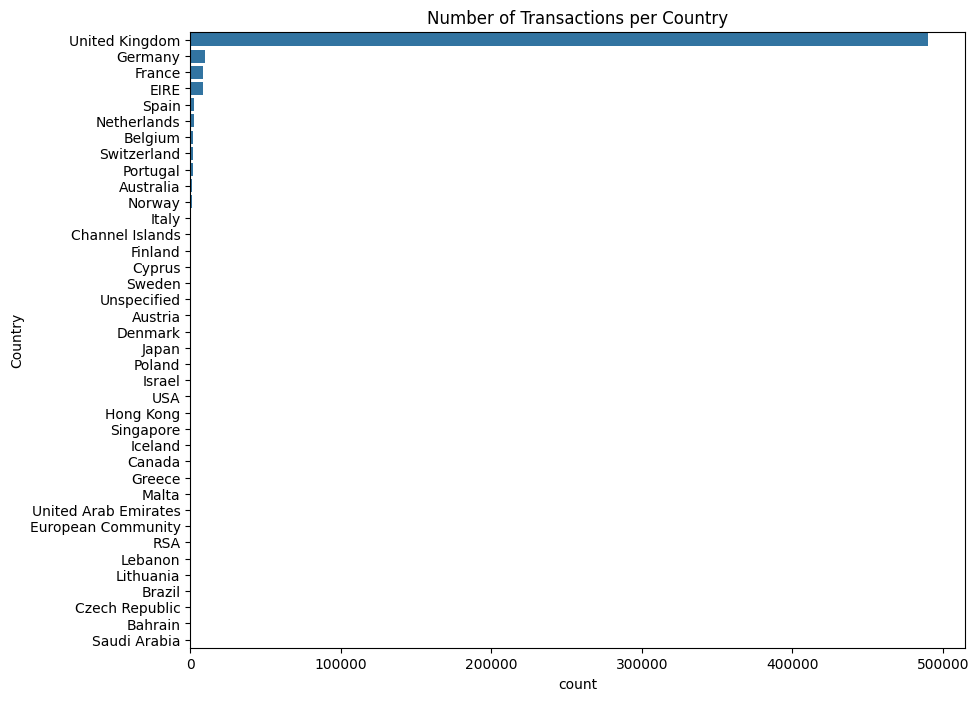

In [127]:
# Count of Transactions per Country
plt.figure(figsize=(10, 8))
sns.countplot(y='Country', data=df, order=df['Country'].value_counts().index)
plt.title('Number of Transactions per Country')
plt.show()

Used barplot to show the number of transactions for each country as a categories. Highlights which countries contribute most to transaction volume and thereby, helps in understanding regional sales performance and planning regional marketing strategies.

### **Chart 2**

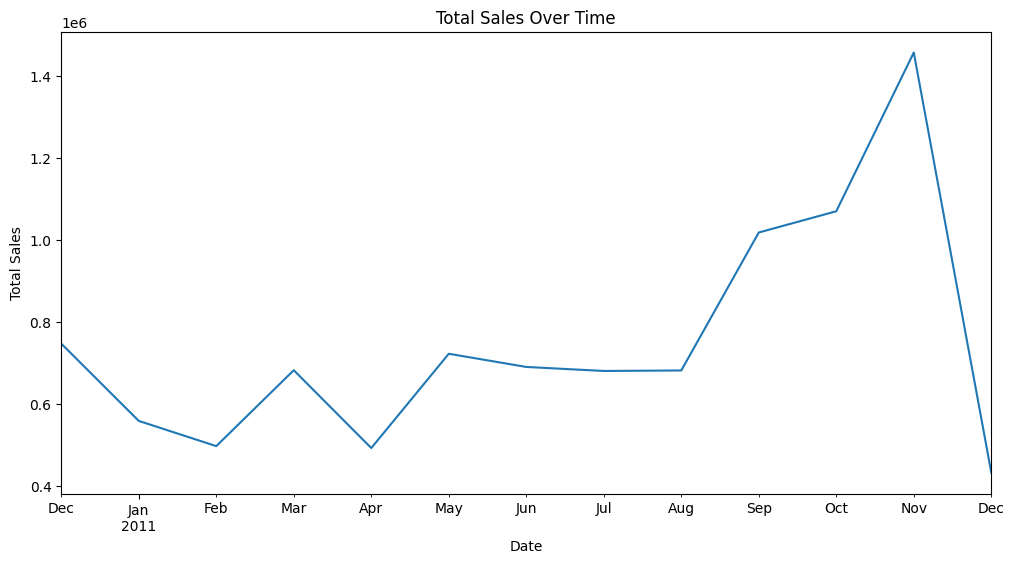

In [128]:
# Add a new column for total sales
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

# Resample data by month and sum up sales
monthly_sales = df.resample('M', on='InvoiceDate')['TotalSales'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

Line plot shows the trend of sales volume with time. It identifies trends and seasonality in sales, such as peak periods or declines and elps in forecasting future sales and planning inventory or promotions.

### **Chart 3**

<ipython-input-129-de645e28fc8a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_products.index, x=top_products.values, palette='viridis')


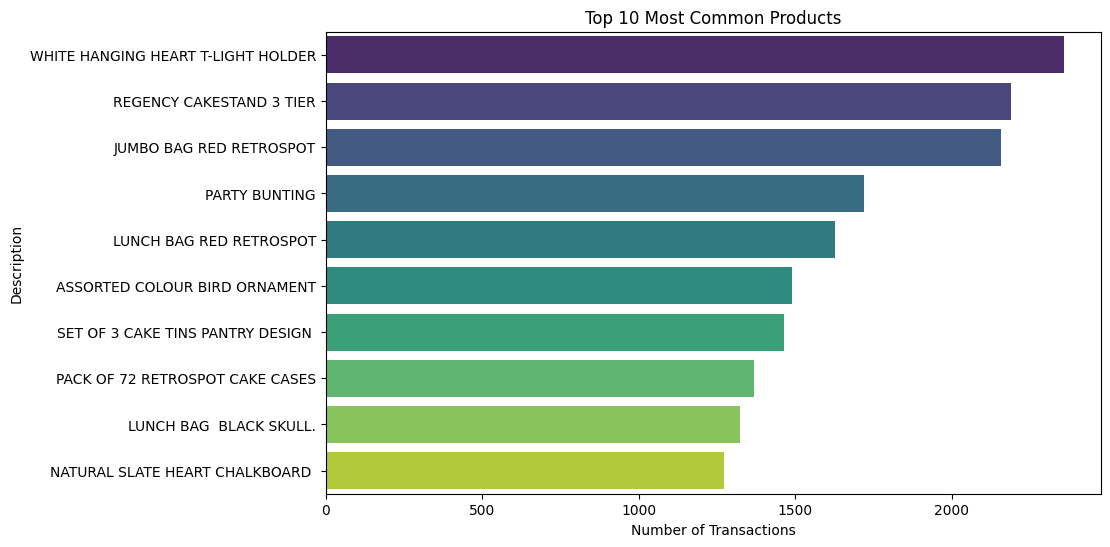

In [129]:
#Top 10 most ordered products

# Identify top products
top_products = df['Description'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_products.index, x=top_products.values, palette='viridis')
plt.title('Top 10 Most Common Products')
plt.xlabel('Number of Transactions')
plt.show()

Bar plot of the most frequently purchased products helps to identify the most popular products based on transaction frequency. It is Useful for analyzing which products are more popular to effectively manage inventory and target promotions for high-demand products.

### **Chart 4**

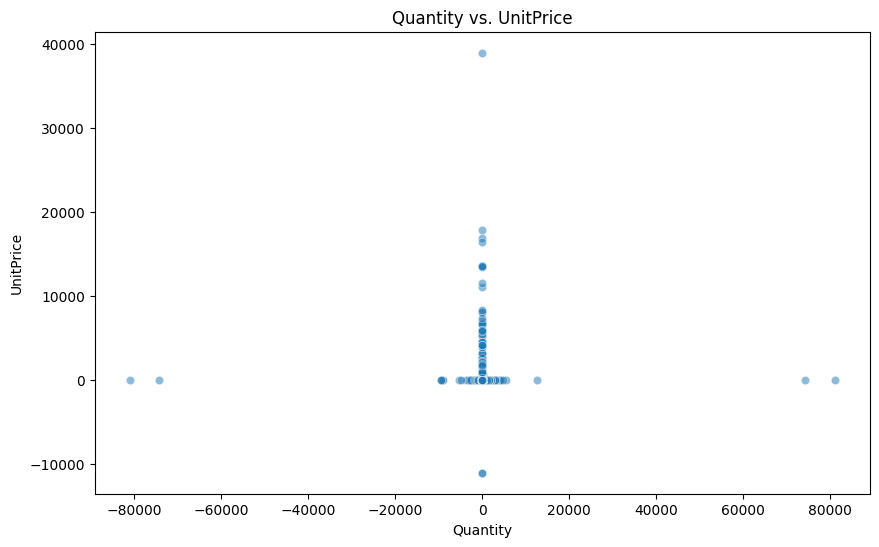

In [130]:
# Scatter Plot of Quantity vs. UnitPrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Quantity', y='UnitPrice', data=df, alpha=0.5)
plt.title('Quantity vs. UnitPrice')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.show()

Scatterplots are a great way to understand the relattionship between variables, unitprice and quantity. It helps to identify purchasing patterns and pricing strategies.

### **Chart 5**

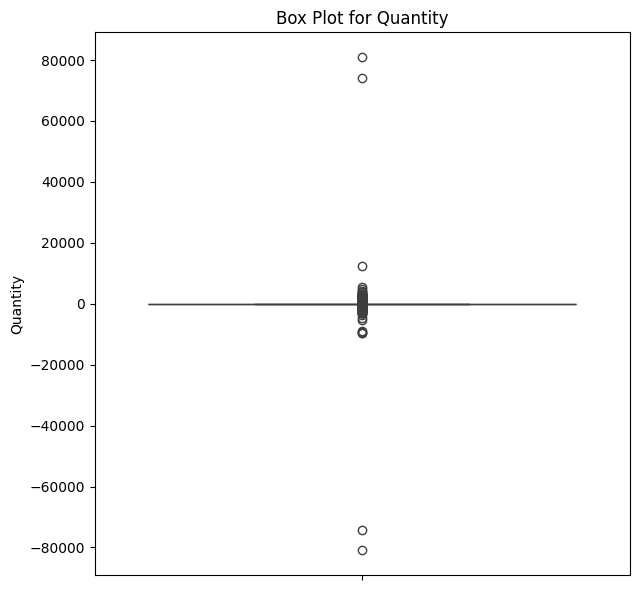

In [131]:
# Box Plot for Quantity
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y='Quantity', data=df)
plt.title('Box Plot for Quantity')

plt.tight_layout()
plt.show()

Box plots helps to identify the outliers and understand the spread of quantity.Shows the central tendency, variability, and presence of outliers in Quantity and
helps in understanding data spread and detecting anomalies.

### **Chart 6**

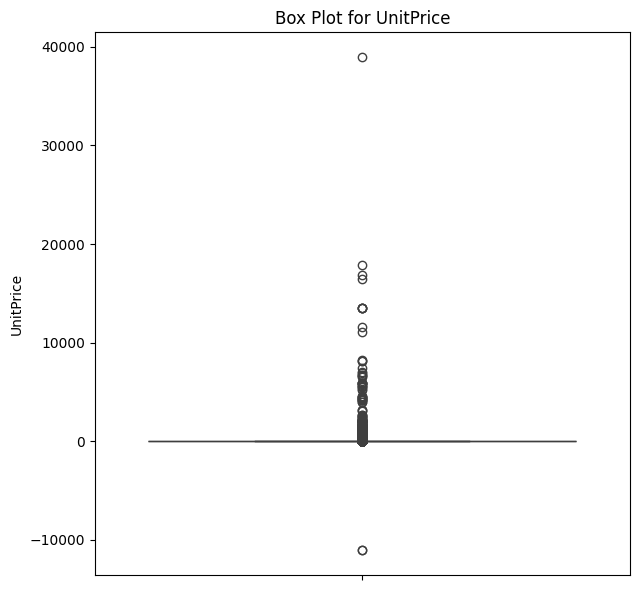

In [132]:
# Box Plot for Unit price
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
sns.boxplot(y='UnitPrice', data=df)
plt.title('Box Plot for UnitPrice')

plt.tight_layout()
plt.show()

Box plots helps to identify the outliers and understand the spread of unitprice.Shows the central tendency, variability, and presence of outliers in unitprice and helps in understanding data spread and detecting anomalies.

## **Hypothesis Testing**

### **Hypothesis 1**

Null Hypothesis (H0): There is no significant correlation between UnitPrice and Quantity.
Alternative Hypothesis (H1): There is a significant correlation between UnitPrice and Quantity.

In [133]:
# Calculate correlation
correlation = df[['UnitPrice', 'Quantity']].corr().iloc[0, 1]
print(f'Correlation: {correlation}')

Correlation: -0.0012410396733569975


In [134]:
# Import required library
from scipy.stats import pearsonr

correlation_coefficient, p_value = pearsonr(df['UnitPrice'], df['Quantity'])
print(f'Correlation Coefficient: {correlation_coefficient}')
print(f'P-value: {p_value}')
alpha = 0.05
if p_value <= alpha:
    print("Reject the null hypothesis. There is a significant correlation between UnitPrice and Quantity.")
else:
    print("Failed to reject the null hypothesis. There is no significant correlation between UnitPrice and Quantity.")

Correlation Coefficient: -0.0012410396733569626
P-value: 0.3632806724391722
Failed to reject the null hypothesis. There is no significant correlation between UnitPrice and Quantity.


Pearson's correlation coefficient is commonly used to measure the strength and direction of the linear relationship between two continuous variables, UnitPrice and Quantity. Pearson’s correlation is ideal as it quantifies the degree to which the two variables change together.

### **Hypothesis 2**

Null Hypothesis (H0): The mean TotalSales is the same across all countries.
Alternative Hypothesis (H1): At least one country has a mean TotalSales that differs from the others.

In [135]:
# Import library
from scipy.stats import f_oneway
# Group data by country
grouped_sales = [group['TotalSales'].values for name, group in df.groupby('Country')]
f_statistic, p_value = f_oneway(*grouped_sales)
print(f'F-statistic: {f_statistic}')
print(f'P-value: {p_value}')
if p_value <= 0.05:
    print("Reject the null hypothesis. At least one country has a mean TotalSales that differs from the others.")
else:
    print("Failed to reject the null hypothesis. The mean TotalSales is the same across all countries.")

F-statistic: 8.140708091008788
P-value: 3.961685539359134e-43
Reject the null hypothesis. At least one country has a mean TotalSales that differs from the others.


## **Feature Engineering and Data preprocessing**

### **1. Handling Missing Values**

In [136]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135037
Country,0
TotalSales,0


In [137]:
# Drop columns having huge number if null values
if 'CustomerID' in df.columns:
  df = df.drop('CustomerID',axis=1)
df.columns.tolist()

['InvoiceNo',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'UnitPrice',
 'Country',
 'TotalSales']

In [138]:
# Map StockCode to Description to fill null values in Description
# Create a mapping from StockCode to Description (excluding rows with null Description)
mapping = df.dropna(subset=['Description']).drop_duplicates(subset=['StockCode'])[['StockCode', 'Description']]
mapping_dict = mapping.set_index('StockCode')['Description'].to_dict()
# Fill null values in Description based on StockCode
df['Description'] = df.apply(lambda row: mapping_dict.get(row['StockCode'], row['Description']), axis=1)

In [139]:
mapping_dict

{'85123A': 'WHITE HANGING HEART T-LIGHT HOLDER',
 71053: 'WHITE METAL LANTERN',
 '84406B': 'CREAM CUPID HEARTS COAT HANGER',
 '84029G': 'KNITTED UNION FLAG HOT WATER BOTTLE',
 '84029E': 'RED WOOLLY HOTTIE WHITE HEART.',
 22752: 'SET 7 BABUSHKA NESTING BOXES',
 21730: 'GLASS STAR FROSTED T-LIGHT HOLDER',
 22633: 'HAND WARMER UNION JACK',
 22632: 'HAND WARMER RED POLKA DOT',
 84879: 'ASSORTED COLOUR BIRD ORNAMENT',
 22745: "POPPY'S PLAYHOUSE BEDROOM ",
 22748: "POPPY'S PLAYHOUSE KITCHEN",
 22749: 'FELTCRAFT PRINCESS CHARLOTTE DOLL',
 22310: 'IVORY KNITTED MUG COSY ',
 84969: 'BOX OF 6 ASSORTED COLOUR TEASPOONS',
 22623: 'BOX OF VINTAGE JIGSAW BLOCKS ',
 22622: 'BOX OF VINTAGE ALPHABET BLOCKS',
 21754: 'HOME BUILDING BLOCK WORD',
 21755: 'LOVE BUILDING BLOCK WORD',
 21777: 'RECIPE BOX WITH METAL HEART',
 48187: 'DOORMAT NEW ENGLAND',
 22960: 'JAM MAKING SET WITH JARS',
 22913: 'RED COAT RACK PARIS FASHION',
 22912: 'YELLOW COAT RACK PARIS FASHION',
 22914: 'BLUE COAT RACK PARIS FASHION',


In [140]:
# Remove rows where Description is missing after filling
df_cleaned = df.dropna(subset=['Description'])

### **2. Handling Outliers**

In [141]:
from scipy.stats import zscore
# Calculate Z-Scores for multiple columns
columns_to_check = ['UnitPrice', 'Quantity', 'TotalSales']
z_scores_df = df_cleaned[columns_to_check].apply(zscore)

# Identify outliers based on Z-Scores (absolute value > 3)
outliers = (z_scores_df.abs() > 3)

# Filter original DataFrame for rows with any outlier values
outlier_rows = df_cleaned[outliers.any(axis=1)]

print("Outliers based on Z-Scores:")
print(outlier_rows)

Outliers based on Z-Scores:
       InvoiceNo StockCode                          Description  Quantity  \
870       536477     21137             BLACK RECORD COVER FRAME       480   
1814      536544       DOT                       DOTCOM POSTAGE         1   
3041      536592       DOT                       DOTCOM POSTAGE         1   
4287     C536757     84347  ROTATING SILVER ANGELS T-LIGHT HLDR     -9360   
4505      536785     22423             REGENCY CAKESTAND 3 TIER       144   
...          ...       ...                                  ...       ...   
540071    581459     22197                 SMALL POPCORN HOLDER      1200   
540421    581483     23843          PAPER CRAFT , LITTLE BIRDIE     80995   
540422   C581484     23843          PAPER CRAFT , LITTLE BIRDIE    -80995   
540908    581492       DOT                       DOTCOM POSTAGE         1   
541540    581498       DOT                       DOTCOM POSTAGE         1   

               InvoiceDate  UnitPrice         C

Z-scores are a powerful tool for statistical analysis, particularly when dealing with normally distributed data or when comparing data across different scales. It is very useful for anomaly detection and quality control.

In [142]:
# Remove rows with any outlier values
df_cleaned = df_cleaned[~outliers.any(axis=1)]

print("DataFrame after removing outliers:")
print(df_cleaned)

DataFrame after removing outliers:
       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice   

### **3.Textual Data preprocessing**

**Lowercasing**

In [143]:
cols = ['Description','Country']
df_cleaned[cols] = df_cleaned[cols].apply(lambda x: x.str.lower())
df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,TotalSales
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,united kingdom,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,united kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,united kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,united kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,united kingdom,20.34


**Removing White spaces**

In [144]:
# Remove White spaces
for col in cols:
    if col in df.columns:
        df[col] = df[col].str.strip()
df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,TotalSales
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,united kingdom,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,united kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,united kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,united kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,united kingdom,20.34


### **4. Encode categorical variables**

In [145]:
df_encoded = pd.get_dummies(df_cleaned, columns=['Country'])

Encoded categorical variables like country and description using label encoding.

In [146]:
df_encoded = df_encoded.drop('Description',axis=1)

## **ML Model Implementation**

### **Standardization**

In [147]:
from sklearn.preprocessing import StandardScaler

features = df_encoded[['Quantity', 'UnitPrice', 'TotalSales']]
scaler = StandardScaler()
# Scale the columns
scaled_features = scaler.fit_transform(features)

StandardScaler standardizes features by removing the mean and scaling to unit variance, ensuring that each feature contributes equally to the distance calculations used in K-Means.

In [148]:
# Import libraries for k means clustering
from sklearn.cluster import KMeans

# Define number of clusters (k)
k = 3

# Apply K-Means
kmeans = KMeans(n_clusters=k, random_state=0)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to the DataFrame
df_encoded['Cluster'] = clusters

print("DataFrame with K-Means clusters:")
print(df_encoded.head())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


DataFrame with K-Means clusters:
  InvoiceNo StockCode  Quantity         InvoiceDate  UnitPrice  TotalSales  \
0    536365    85123A         6 2010-12-01 08:26:00       2.55       15.30   
1    536365     71053         6 2010-12-01 08:26:00       3.39       20.34   
2    536365    84406B         8 2010-12-01 08:26:00       2.75       22.00   
3    536365    84029G         6 2010-12-01 08:26:00       3.39       20.34   
4    536365    84029E         6 2010-12-01 08:26:00       3.39       20.34   

   Country_australia  Country_austria  Country_bahrain  Country_belgium  ...  \
0              False            False            False            False  ...   
1              False            False            False            False  ...   
2              False            False            False            False  ...   
3              False            False            False            False  ...   
4              False            False            False            False  ...   

   Country_saudi 

## **Conclusion**


In this analysis, we applied K-Means clustering to segment our customer data based on purchasing behavior. After selecting and standardizing key numerical features such as Quantity, UnitPrice, and TotalSales, we used the K-Means algorithm to identify three distinct customer segments. The results, indicated by the cluster labels appended to our DataFrame, reveal meaningful customer groups based on their purchasing patterns. This segmentation allows us to implement targeted marketing strategies, tailor product recommendations, and enhance customer engagement. Overall, the K-Means clustering has provided valuable insights into customer behavior, enabling the company to optimize its sales and marketing efforts more effectively.